# Thematic Analysis of Bank Reviews

## 1. Theme Extraction and Analysis

### Overview
This analysis will identify key themes from the cleaned review data for three Ethiopian banks:
- Commercial Bank of Ethiopia (CBE)
- Bank of Abyssinia (BOA)
- Dashen Bank

### Theme Categories
We will identify and analyze the following themes:
1. Account Access Issues
   - Login problems
   - Authentication issues
   - Account security concerns

2. Transaction Performance
   - Transfer speed
   - Transaction failures
   - Payment processing

3. User Interface & Experience
   - App design
   - Navigation
   - Visual elements
   - Ease of use

4. Customer Support
   - Response time
   - Support quality
   - Issue resolution

5. Feature Requests
   - New features
   - Improvements
   - Additional functionality

### Analysis Approach
1. Keyword Extraction
   - Use spaCy for named entity recognition
   - Extract important phrases and technical terms
   - Identify banking-specific vocabulary

2. Theme Identification
   - Group related keywords into themes
   - Calculate theme frequency per bank
   - Identify common and unique themes

3. Theme Distribution
   - Analyze theme distribution across banks
   - Compare theme frequencies
   - Identify bank-specific issues

### Expected Output
- Theme distribution for each bank
- Most common themes
- Bank-specific theme analysis
- Actionable insights for each bank

<Figure size 1500x800 with 0 Axes>

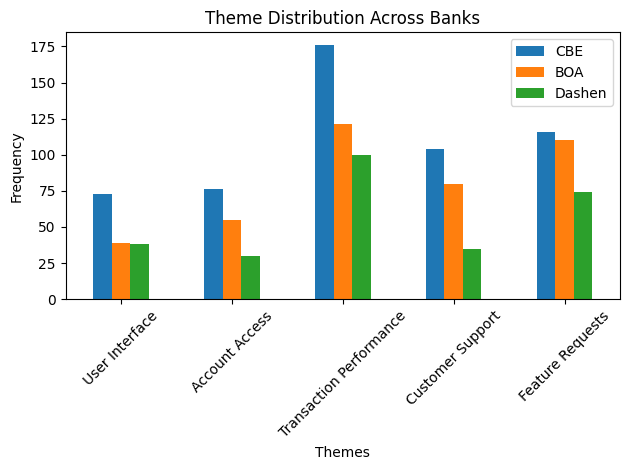


Theme Distribution Analysis:

Total Reviews per Bank:
bank
CBE       932
BOA       633
Dashen    388
Name: count, dtype: int64

Theme Frequencies by Bank:
                         CBE  BOA  Dashen
User Interface            73   39      38
Account Access            76   55      30
Transaction Performance  176  121     100
Customer Support         104   80      35
Feature Requests         116  110      74

Theme Percentages by Bank:
                               CBE        BOA     Dashen
User Interface           13.394495   9.629630  13.718412
Account Access           13.944954  13.580247  10.830325
Transaction Performance  32.293578  29.876543  36.101083
Customer Support         19.082569  19.753086  12.635379
Feature Requests         21.284404  27.160494  26.714801

Theme Summary:

CBE:
Most common themes: [('Transaction Performance', 176), ('Feature Requests', 116), ('Customer Support', 104)]
Total themes identified: 545

BOA:
Most common themes: [('Transaction Performance', 121), (

In [3]:
import pandas as pd
import spacy
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define theme keywords
theme_keywords = {
    'Account Access': [
        'login', 'password', 'authentication', 'security', 'account',
        'access', 'verify', 'biometric', 'fingerprint', 'face id'
    ],
    'Transaction Performance': [
        'transfer', 'transaction', 'payment', 'send', 'receive',
        'slow', 'fast', 'speed', 'process', 'complete'
    ],
    'User Interface': [
        'interface', 'ui', 'design', 'layout', 'screen',
        'button', 'menu', 'navigation', 'view', 'display'
    ],
    'Customer Support': [
        'support', 'help', 'service', 'assist', 'contact',
        'response', 'resolve', 'issue', 'problem', 'complaint'
    ],
    'Feature Requests': [
        'feature', 'function', 'option', 'tool', 'capability',
        'add', 'implement', 'include', 'new', 'improve'
    ]
}

# Load cleaned data
data_path = Path('../data/cleaned')
analyzed_path = Path('../data/analyzed')
analyzed_path.mkdir(exist_ok=True)

# Load the cleaned data
cbe_df = pd.read_csv(data_path / 'Commercial_Bank_of_Ethiopia_cleaned_data.csv')
boa_df = pd.read_csv(data_path / 'Bank_of_Abyssinia_cleaned_data.csv')
dashen_df = pd.read_csv(data_path / 'Dashen_Bank_cleaned_data.csv')

# Add bank name column
cbe_df['bank'] = 'CBE'
boa_df['bank'] = 'BOA'
dashen_df['bank'] = 'Dashen'

# Combine all dataframes
all_reviews = pd.concat([cbe_df, boa_df, dashen_df], ignore_index=True)

def extract_themes(text):
    """
    Extract themes from text based on keyword matching
    """
    if not isinstance(text, str):
        return []
    
    # Process text with spaCy
    doc = nlp(text.lower())
    
    # Extract themes based on keyword matching
    found_themes = []
    for theme, keywords in theme_keywords.items():
        if any(keyword in text.lower() for keyword in keywords):
            found_themes.append(theme)
    
    return found_themes

# Apply theme extraction
all_reviews['themes'] = all_reviews['review'].apply(extract_themes)

# Calculate theme frequencies
def calculate_theme_frequencies(df):
    theme_counts = Counter()
    for themes in df['themes']:
        theme_counts.update(themes)
    return theme_counts

# Calculate theme frequencies for each bank
cbe_themes = calculate_theme_frequencies(all_reviews[all_reviews['bank'] == 'CBE'])
boa_themes = calculate_theme_frequencies(all_reviews[all_reviews['bank'] == 'BOA'])
dashen_themes = calculate_theme_frequencies(all_reviews[all_reviews['bank'] == 'Dashen'])

# Create theme distribution DataFrame
theme_distribution = pd.DataFrame({
    'CBE': cbe_themes,
    'BOA': boa_themes,
    'Dashen': dashen_themes
}).fillna(0)

# Save theme distribution
theme_distribution.to_csv(analyzed_path / 'theme_distribution.csv')

# Visualize theme distribution
plt.figure(figsize=(15, 8))
theme_distribution.plot(kind='bar')
plt.title('Theme Distribution Across Banks')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(analyzed_path / 'theme_distribution.png')
plt.show()

# Calculate theme percentages
theme_percentages = theme_distribution.div(theme_distribution.sum()) * 100

# Save theme percentages
theme_percentages.to_csv(analyzed_path / 'theme_percentages.csv')

# Print theme analysis results
print("\nTheme Distribution Analysis:")
print("\nTotal Reviews per Bank:")
print(all_reviews['bank'].value_counts())

print("\nTheme Frequencies by Bank:")
print(theme_distribution)

print("\nTheme Percentages by Bank:")
print(theme_percentages)

# Save detailed theme analysis
all_reviews[['review', 'bank', 'themes']].to_csv(analyzed_path / 'detailed_theme_analysis.csv', index=False)

# Generate theme summary
theme_summary = {
    'CBE': {
        'most_common': cbe_themes.most_common(3),
        'total_themes': sum(cbe_themes.values())
    },
    'BOA': {
        'most_common': boa_themes.most_common(3),
        'total_themes': sum(boa_themes.values())
    },
    'Dashen': {
        'most_common': dashen_themes.most_common(3),
        'total_themes': sum(dashen_themes.values())
    }
}

# Save theme summary
import json
with open(analyzed_path / 'theme_summary.json', 'w') as f:
    json.dump(theme_summary, f, indent=4)

print("\nTheme Summary:")
for bank, data in theme_summary.items():
    print(f"\n{bank}:")
    print(f"Most common themes: {data['most_common']}")
    print(f"Total themes identified: {data['total_themes']}")